In [1]:
'''
INF 385T UTexas:: byron wallace
Sp 2016
lecture 2: basic prob and stat review
'''
# hide warnings to keep things tidy.
import warnings
warnings.filterwarnings('ignore')
import random

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.style.use('ggplot') # make things a bit prettier.

import pandas as pd
import statsmodels.api as sm  # this is new! we'll be using the lovely statsmodels often.

In [2]:
##
# flipping coins
#  (could also just use random.choice(["H", "T"]))
def coin_flip(p=.5):
    if random.random() >= p:
        return "H"
    return "T"

def flip_coins(n):
    flips = [coin_flip() for _ in range(n)]
    flips_dict = {"H":flips.count("H"), "T":flips.count("T")}
    # plot
    plt.bar(range(len(flips_dict)), flips_dict.values(), width=0.5, align='center')
    ticks = plt.xticks([0,1], ["H", "T"])
    ## parameter fitting (maximimum likelihood)
    pi_hat = flips_dict["H"] / sum(flips_dict.values())
    return pi_hat

0.2


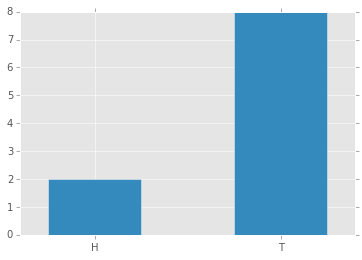

In [5]:
print(flip_coins(10))

0.48


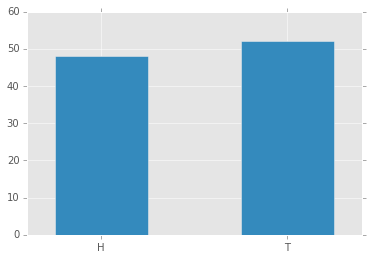

In [6]:
print(flip_coins(100))

0.495


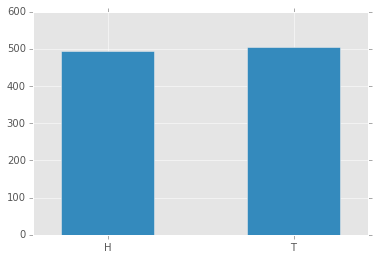

In [7]:
print(flip_coins(1000))

0.5042


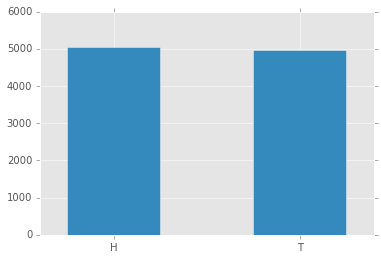

In [8]:
print(flip_coins(10000))

In [9]:
####
# hypothesis testing
d = pd.read_csv("heights_weights_genders.csv") # familiar from our in-class exercise
male_heights = d[d["Gender"] == "Male"]["Height"].values
female_heights = d[d["Gender"] == "Female"]["Height"].values
tstat, pvalue, df = sm.stats.ttest_ind(male_heights, female_heights)
print(pvalue)

0.0


In [10]:
#### frequentist v bayesian; a strawman example ####

0.0


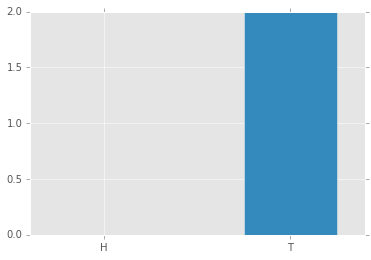

In [12]:
# let's first take a frequentist estimate from two flips
p_hat = flip_coins(2)
print(p_hat)

In [13]:
# yikes! a pretty poor estimate probably (p=0??)
import pymc3 # pymc3 is a library for doing bayesian stats and sampling
# so we need to set a 'prior' over the parameter of interest,
# p ... let's say we feel noncommital, i.e., we have no reason to believe 
# the coin is going to be fair. in this case, we can use a 'uniform'
# prior. it turns out the 'conjugate' prior to the bernoulli is the 
# beta distribution. here we're telling numpy to draw 1000 samples from 
# a beta distribution with parameters 1,1

(array([  88.,  103.,  109.,   97.,  115.,   93.,  103.,   90.,   99.,  103.]),
 array([ 0.00138661,  0.10121305,  0.20103949,  0.30086592,  0.40069236,
         0.5005188 ,  0.60034523,  0.70017167,  0.79999811,  0.89982454,
         0.99965098]),
 <a list of 10 Patch objects>)

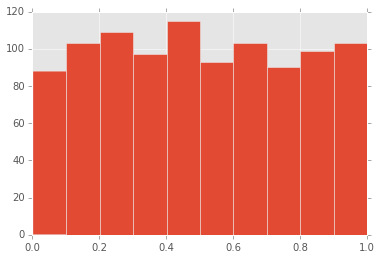

In [14]:
plt.hist(np.random.beta(1,1,1000))

In [15]:
import pymc3
import scipy.stats as stats
from pymc3.distributions import Beta

def run_inference(alpha, beta, n=2, h=0, niter = 1000):
    with pymc3.Model() as model:
        # define prior; as above
        p = pymc3.Beta('p', alpha=alpha, beta=beta)
        y = pymc3.Binomial('y', n=n, p=p, observed=h)
        start = pymc3.find_MAP()
        step = pymc3.Metropolis() 
        trace = pymc3.sample(niter, step, start, random_seed=123, progressbar=True)

    plt.hist(trace['p'], 15, histtype='step', normed=True, label='post')
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior')
    plt.legend(loc='best')

Applied logodds-transform to p and added transformed p_logodds to model.
 [-----------------100%-----------------] 1000 of 1000 complete in 0.2 sec

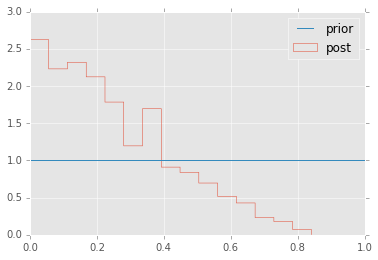

In [16]:
run_inference(1,1)

(array([  25.,   63.,  126.,  172.,  199.,  172.,  121.,   88.,   24.,   10.]),
 array([ 0.1380953 ,  0.21609339,  0.29409147,  0.37208956,  0.45008764,
         0.52808572,  0.60608381,  0.68408189,  0.76207998,  0.84007806,
         0.91807615]),
 <a list of 10 Patch objects>)

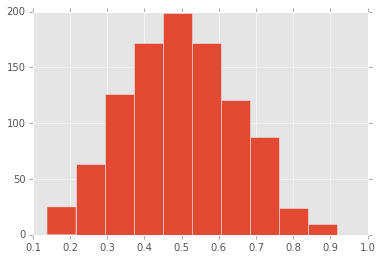

In [17]:
plt.hist(np.random.beta(5,5,1000))

Applied logodds-transform to p and added transformed p_logodds to model.
 [-----------------100%-----------------] 1000 of 1000 complete in 0.1 sec

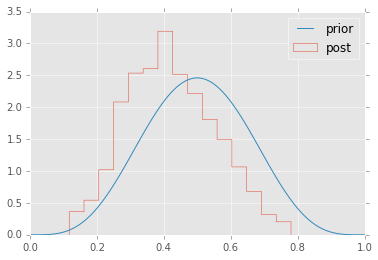

In [18]:
run_inference(5,5)